## Prediction using Supervised Machine Learning


#### by : Koushik

In [3]:
#Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [4]:
#importing data from the remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")
s_data.head(10)  # readiing first ten data from the data set

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
s_data.head() #automatically takes first five data from the data set

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Plotting data points on 2-D graph to find any relationship between the data

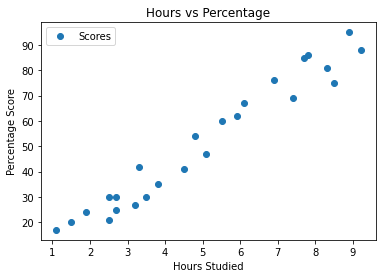

In [6]:
#Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### From the above graph,we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.


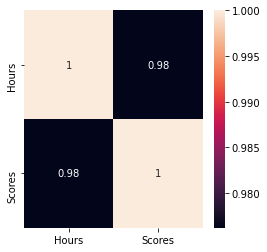

In [7]:
#correlation plot
plt.figure(figsize=(4,4))
correlation_matrix = s_data.corr()
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

### Preparing the data
#### Dividing the data into "attributes" (inputs) and "labels" (outputs).

In [8]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values

#### The next step is to split this data into training and test sets

In [9]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)               

### Training the Algorithm
##### We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [10]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Training complete.")

Training complete.


### Plotting the regression line

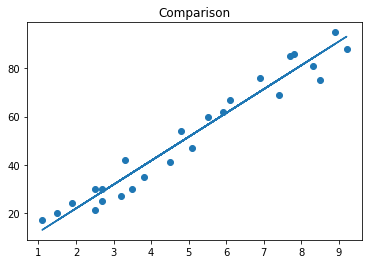

In [11]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.title("Comparison")
plt.show()

### Making Predictions

In [12]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### Comparing Actual vs Predicted

In [13]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Testing on our required data

In [14]:
score_pred=np.array([7])
score_pred=score_pred.reshape(-1,1)
predict=regressor.predict(score_pred)
print("No of hours={}".format(7))
print("Predicted Score={}".format(predict[0]))

No of hours=7
Predicted Score=71.39275540593034


### Evaluating the model

In [15]:
#To evalute the performance of the algorithm
#For simplicity here, we have use Mean square error
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

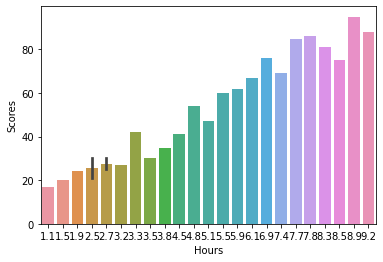

In [16]:
#Aim: To predict the no of seconds we have in 'X' minutes
#import seaborn as sns
#sns.barplot(x='Hours', y='Scores', data=s_data)

In [19]:
# Importing metrics from sklearn 
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# To find Root Mean Squared Error(rmse)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print("RMSE:",rmse)

# To find coefficient of determination
r2 =  r2_score(y_test, y_pred)
print("R-Square:",r2)

RMSE: 4.6474476121003665
R-Square: 0.9454906892105356


### The accuracy of the model is 94.55%. The mean absolute error is 4.18%.

In [20]:
User_input = float(input())
print('Hours: {}'.format(User_input))
print('Predicted Score{}'.format(regressor.predict([[User_input]])))

9
Hours: 9.0
Predicted Score[91.21406837]
